In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# points: array của top_left, top_right, bottom_right, bottom_left
def align_image_4points(image_src, pts1, offset_lf=50, offset_tb=0):
    
   img_w, img_h = image_src.shape[0], image_src.shape[1]
   pts2 = np.float32([[0+offset_lf,0+offset_tb], [img_w-1-offset_lf, 0+offset_tb], [img_w-1-offset_lf,img_h-1-offset_tb], [0+offset_lf,img_h-1-offset_tb]])

#    print(np.float32(pts1), pts2.dtype)
   M = cv2.getPerspectiveTransform(np.float32(pts1), pts2) 
   transformed_img = cv2.warpPerspective(image_src, M, (img_w, img_h)) 
   return transformed_img

# points: array của top_left, top_right, bottom_right
def align_image_3points_miss_bl(image_src, pts1, offset_lf=50, offset_tb=0):
    
   img_w, img_h = image_src.shape[0], image_src.shape[1]
   pts2 = np.float32([[0+offset_lf,0+offset_tb], [img_w-1-offset_lf, 0+offset_tb], [img_w-1-offset_lf,img_h-1-offset_tb]])

   M = cv2.getAffineTransform(np.float32(pts1), pts2) 
   transformed_img = cv2.warpAffine(image_src, M, (img_w, img_h)) 
   return transformed_img

# points: array của top-right, bottom-right, bottom-left
def align_image_3points_miss_tl(image_src, pts1, offset_lf=50, offset_tb=0):
    
   img_w, img_h = image_src.shape[0], image_src.shape[1]
   pts2 = np.float32([[img_w-1-offset_lf, 0+offset_tb], [img_w-1-offset_lf,img_h-1-offset_tb], [0+offset_lf,img_h-1-offset_tb]])

   M = cv2.getAffineTransform(np.float32(pts1), pts2) 
   transformed_img = cv2.warpAffine(image_src, M, (img_w, img_h)) 
   return transformed_img

# points: array của bottom-right, bottom-left, top-left
def align_image_3points_miss_tr(image_src, pts1, offset_lf=50, offset_tb=0):
    
   img_w, img_h = image_src.shape[0], image_src.shape[1]
   pts2 = np.float32([[img_w-1-offset_lf, img_h-1-offset_tb], [0+offset_lf,img_h-1-offset_tb], [0+offset_lf,0+offset_tb]])

   M = cv2.getAffineTransform(np.float32(pts1), pts2) 
   transformed_img = cv2.warpAffine(image_src, M, (img_w, img_h)) 
   return transformed_img

# points: array của bottom-left, top-left, top-right
def align_image_3points_miss_br(image_src, pts1, offset_lf=50, offset_tb=0):
    
   img_w, img_h = image_src.shape[0], image_src.shape[1]
   pts2 = np.float32([[0+offset_lf, img_h-1-offset_tb], [0+offset_lf,0+offset_tb], [img_w-1-offset_lf,0+offset_tb]])

   M = cv2.getAffineTransform(np.float32(pts1), pts2) 
   transformed_img = cv2.warpAffine(image_src, M, (img_w, img_h)) 
   return transformed_img


(<AxesSubplot:title={'center':'Ảnh sau biến đổi'}>,
 Text(0.5, 1.0, 'Ảnh sau biến đổi'))

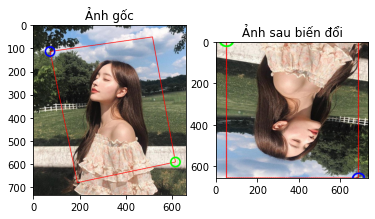

In [24]:
image = cv2.imread("hotgirl.jpg")
# TH1: có đủ 4 điểm
pts1 = np.array([[614,592], [191,681], [73,114], [515,51]])
img1 = cv2.drawContours(image, [pts1], 0,(0,0,255),2)
img1 = cv2.circle(img1, (pts1[0][0], pts1[0][1]), 20, (0,255,0), 5)
img1 = cv2.circle(img1, (pts1[2][0], pts1[2][1]), 20, (255,0,0), 5)
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title("Ảnh gốc")
transform_img = align_image_4points(image, pts1)
plt.subplot(122), plt.imshow(cv2.cvtColor(transform_img, cv2.COLOR_BGR2RGB)), plt.title("Ảnh sau biến đổi")

(<AxesSubplot:title={'center':'Ảnh sau biến đổi'}>,
 Text(0.5, 1.0, 'Ảnh sau biến đổi'))

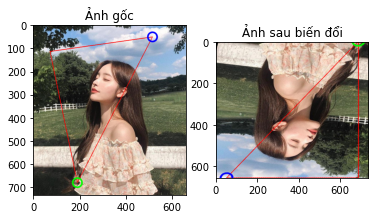

In [25]:
image = cv2.imread("hotgirl.jpg")
# TH2: mất top-left
pts1 = np.array([[191,681], [73,114], [515,51]])
img1 = cv2.drawContours(image, [pts1], 0,(0,0,255),2)
img1 = cv2.circle(img1, (pts1[0][0], pts1[0][1]), 20, (0,255,0), 5)
img1 = cv2.circle(img1, (pts1[2][0], pts1[2][1]), 20, (255,0,0), 5)
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title("Ảnh gốc")
transform_img = align_image_3points_miss_tl(image, pts1)
plt.subplot(122), plt.imshow(cv2.cvtColor(transform_img, cv2.COLOR_BGR2RGB)), plt.title("Ảnh sau biến đổi")

(<AxesSubplot:title={'center':'Ảnh sau biến đổi'}>,
 Text(0.5, 1.0, 'Ảnh sau biến đổi'))

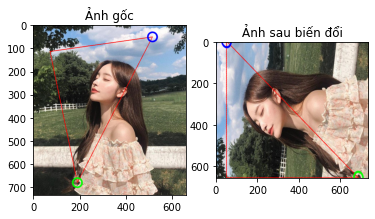

In [26]:
image = cv2.imread("hotgirl.jpg")
# TH2: mất top-right
pts1 = np.array([[191,681], [73,114], [515,51]])
img1 = cv2.drawContours(image, [pts1], 0,(0,0,255),2)
img1 = cv2.circle(img1, (pts1[0][0], pts1[0][1]), 20, (0,255,0), 5)
img1 = cv2.circle(img1, (pts1[2][0], pts1[2][1]), 20, (255,0,0), 5)
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title("Ảnh gốc")
transform_img = align_image_3points_miss_tr(image, pts1)
plt.subplot(122), plt.imshow(cv2.cvtColor(transform_img, cv2.COLOR_BGR2RGB)), plt.title("Ảnh sau biến đổi")

NameError: name 'offset' is not defined

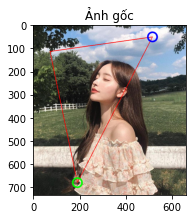

In [27]:
image = cv2.imread("hotgirl.jpg")
# TH2: mất bottom-left
pts1 = np.array([[191,681], [73,114], [515,51]])
img1 = cv2.drawContours(image, [pts1], 0,(0,0,255),2)
img1 = cv2.circle(img1, (pts1[0][0], pts1[0][1]), 20, (0,255,0), 5)
img1 = cv2.circle(img1, (pts1[2][0], pts1[2][1]), 20, (255,0,0), 5)
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title("Ảnh gốc")
transform_img = align_image_3points_miss_bl(image, pts1)
plt.subplot(122), plt.imshow(cv2.cvtColor(transform_img, cv2.COLOR_BGR2RGB)), plt.title("Ảnh sau biến đổi")

In [ ]:
image = cv2.imread("hotgirl.jpg")
# TH2: mất bottom-right
pts1 = np.array([[191,681], [73,114], [515,51]])
img1 = cv2.drawContours(image, [pts1], 0,(0,0,255),2)
img1 = cv2.circle(img1, (pts1[0][0], pts1[0][1]), 20, (0,255,0), 5)
img1 = cv2.circle(img1, (pts1[2][0], pts1[2][1]), 20, (255,0,0), 5)
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title("Ảnh gốc")
transform_img = align_image_3points_miss_br(image, pts1)
plt.subplot(122), plt.imshow(cv2.cvtColor(transform_img, cv2.COLOR_BGR2RGB)), plt.title("Ảnh sau biến đổi")

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


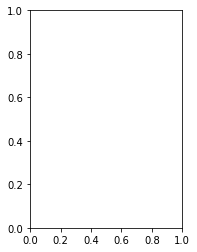

In [13]:
image = cv2.imread("img_9_25_12_padded.jpg")
pts1 = np.array([[175,71], [453,94], [456,780], [113,780]])
width, height = cv2.minAreaRect(pts1)[1]
width, height = int(width), int(height)
img1 = cv2.drawContours(image, [pts1], 0,(0,0,255),2)
img1 = cv2.circle(img1, (pts1[0][0], pts1[0][1]), 20, (0,255,0), 5)
img1 = cv2.circle(img1, (pts1[2][0], pts1[2][1]), 20, (255,0,0), 5)
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title("Ảnh gốc")
transform_img = align_image_4points(image, pts1)
transform_img_resize = cv2.resize(transform_img, (width, height))
print(transform_img_resize.shape)
cv2.imwrite("Recipt after crop and rotate.jpg", transform_img_resize)
plt.subplot(122), plt.imshow(cv2.cvtColor(transform_img_resize, cv2.COLOR_BGR2RGB)), plt.title("Ảnh sau biến đổi")

In [16]:
image = plt.imread("../datasets/COOP/padded_1280/img_113_25_12_padded.jpg")
pts1 = np.array([[343,891], [439,511], [1705,809], [1603,1213]])
width, height = cv2.minAreaRect(pts1)[1]
width, height = int(width), int(height)
img1 = cv2.drawContours(image, [pts1], 0,(0,0,255),2)
img1 = cv2.circle(img1, (pts1[0][0], pts1[0][1]), 20, (0,255,0), 5)
img1 = cv2.circle(img1, (pts1[2][0], pts1[2][1]), 20, (255,0,0), 5)


(416, 1300, 3)


(<AxesSubplot:title={'center':'Ảnh sau biến đổi'}>,
 Text(0.5, 1.0, 'Ảnh sau biến đổi'))

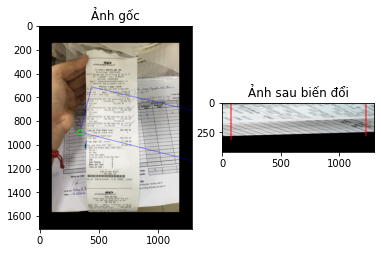

In [17]:
plt.subplot(121)
plt.imshow(img1)
plt.title("Ảnh gốc")

transform_img = align_image_4points(image, pts1, 100)
transform_img_resize = cv2.resize(transform_img, (width, height))
print(transform_img_resize.shape)
cv2.imwrite("Recipt after crop and rotate.jpg", transform_img_resize)
plt.subplot(122), plt.imshow(cv2.cvtColor(transform_img_resize, cv2.COLOR_BGR2RGB)), plt.title("Ảnh sau biến đổi")

In [4]:
pts1 = np.array([[343,891], [439,511], [1705,809], [1603,1213]])
pts1.shape


(4, 2)

In [2]:
def align_image_4points(image_src, pts1, offset_lf=50, offset_tb=0):
    
    img_w, img_h = image_src.shape[0], image_src.shape[1]
    pts2 = np.float32([[0+offset_lf,0+offset_tb], [img_w-1-offset_lf, 0+offset_tb], [img_w-1-offset_lf,img_h-1-offset_tb], [0+offset_lf,img_h-1-offset_tb]])

    #    print(np.float32(pts1), pts2.dtype)
    M = cv2.getPerspectiveTransform(np.float32(pts1), pts2) 
    transformed_img = cv2.warpPerspective(image_src, M, (img_w, img_h)) 
    return transformed_img




In [ ]:
img = 'datasets/COOP/padded_1280/img_12_padded.jpg'
plt.imshow